## KEY FEATURES

incident_key - Randomly generated persistent ID for each arrest
occur_date - Exact date of the shooting incident
occur_time - Exact time of the shooting incident
boro - Borough where the shooting incident occurred
loc_of_occur_desc - (no description provided)
precinct - Precinct where the shooting incident occurred
jurisdiction_code - Jurisdiction where the shooting incident occurred. Jurisdiction codes 0(Patrol), 1(Transit) and 2(Housing) represent NYPD whilst codes 3 and more represent non NYPD jurisdictions
loc_classfctn_desc - (no description provided)
location_desc - Location of the shooting incident
statistical_murder_flag - Shooting resulted in the victim's death which would be counted as a murder
perp_age_group - Perpetrator's age within a category
perp_sex - Perpetrator's sex description
perp_race - Perpetrator's race description
vic_age_group - Victim's age within a category
vic_sex - Victim's sex description
vic_race - Victim's race description
x_coord_cd - Midblock X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
y_coord_cd - Midblock Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
latitude - Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
longitude - Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
Lon_Lat (geocoded_column) - Longitude and Latitude Coordinates for mapping

## IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score,  confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\spinnaker project\given data\NYPD_Shooting_Incident_Data__Historic_.csv")

In [3]:
data

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME       BORO LOC_OF_OCCUR_DESC  \
0         228798151  05/27/2021   21:30:00     QUEENS               NaN   
1         137471050  06/27/2014   17:40:00      BRONX               NaN   
2         147998800  11/21/2015   03:56:00     QUEENS               NaN   
3         146837977  10/09/2015   18:30:00      BRONX               NaN   
4          58921844  02/19/2009   22:58:00      BRONX               NaN   
...             ...         ...        ...        ...               ...   
27307     245029823  05/14/2022   03:02:00      BRONX           OUTSIDE   
27308     239583450  01/22/2022   13:15:00  MANHATTAN           OUTSIDE   
27309     246825728  06/18/2022   03:29:00  MANHATTAN           OUTSIDE   
27310     246876579  06/19/2022   20:08:00      BRONX            INSIDE   
27311     239861542  01/28/2022   18:14:00      BRONX           OUTSIDE   

       PRECINCT  JURISDICTION_CODE LOC_CLASSFCTN_DESC  \
0           105                0.0                NaN   
1            40                0.0                NaN   
2           108                0.0                NaN   
3            44                0.0                NaN   
4            47                0.0                NaN   
...         ...                ...                ...   
27307        48                0.0             STREET   
27308        30                0.0             STREET   
27309        32                0.0             STREET   
27310        46                2.0            HOUSING   
27311        45                0.0             STREET   

                   LOCATION_DESC  STATISTICAL_MURDER_FLAG  ... PERP_SEX  \
0                            NaN                    False  ...      NaN   
1                            NaN                    False  ...      NaN   
2                            NaN                     True  ...      NaN   
3                            NaN                    False  ...      NaN   
4                            NaN                     True  ...        M   
...                          ...                      ...  ...      ...   
27307                     (null)                    False  ...   (null)   
27308                     (null)                    False  ...        F   
27309                     (null)                    False  ...        M   
27310  MULTI DWELL - PUBLIC HOUS                    False  ...        M   
27311                     (null)                    False  ...        M   

            PERP_RACE VIC_AGE_GROUP VIC_SEX        VIC_RACE    X_COORD_CD  \
0                 NaN         18-24       M           BLACK  1.058925e+06   
1                 NaN         18-24       M           BLACK  1.005028e+06   
2                 NaN         25-44       M           WHITE  1.007668e+06   
3                 NaN           <18       M  WHITE HISPANIC  1.006537e+06   
4               BLACK         45-64       M           BLACK  1.024922e+06   
...               ...           ...     ...             ...           ...   
27307          (null)         18-24       M           BLACK  1.011526e+06   
27308  WHITE HISPANIC         25-44       M  WHITE HISPANIC  9.974580e+05   
27309           BLACK         25-44       M           BLACK  1.000999e+06   
27310           BLACK         25-44       M  WHITE HISPANIC  1.012980e+06   
27311           BLACK         18-24       M           BLACK  1.026549e+06   

          Y_COORD_CD   Latitude  Longitude  \
0      180924.000000  40.662965 -73.730839   
1      234516.000000  40.810352 -73.924942   
2      209836.531250  40.742607 -73.915492   
3      244511.140625  40.837782 -73.919457   
4      262189.406250  40.886238 -73.852910   
...              ...        ...        ...   
27307  247828.000000  40.846864 -73.901413   
27308  240485.000000  40.826743 -73.952273   
27309  234464.000000  40.810209 -73.939496   
27310  251028.000000  40.855644 -73.896141   
27311  244293.000000  40.837102 -73.847134   

                                          

In [4]:
data.head()

INCIDENT_KEY  OCCUR_DATE OCCUR_TIME    BORO LOC_OF_OCCUR_DESC  PRECINCT  \
0     228798151  05/27/2021   21:30:00  QUEENS               NaN       105   
1     137471050  06/27/2014   17:40:00   BRONX               NaN        40   
2     147998800  11/21/2015   03:56:00  QUEENS               NaN       108   
3     146837977  10/09/2015   18:30:00   BRONX               NaN        44   
4      58921844  02/19/2009   22:58:00   BRONX               NaN        47   

   JURISDICTION_CODE LOC_CLASSFCTN_DESC LOCATION_DESC  \
0                0.0                NaN           NaN   
1                0.0                NaN           NaN   
2                0.0                NaN           NaN   
3                0.0                NaN           NaN   
4                0.0                NaN           NaN   

   STATISTICAL_MURDER_FLAG  ... PERP_SEX PERP_RACE VIC_AGE_GROUP VIC_SEX  \
0                    False  ...      NaN       NaN         18-24       M   
1                    False  ...      NaN       NaN         18-24       M   
2                     True  ...      NaN       NaN         25-44       M   
3                    False  ...      NaN       NaN           <18       M   
4                     True  ...        M     BLACK         45-64       M   

         VIC_RACE    X_COORD_CD     Y_COORD_CD   Latitude  Longitude  \
0           BLACK  1.058925e+06  180924.000000  40.662965 -73.730839   
1           BLACK  1.005028e+06  234516.000000  40.810352 -73.924942   
2           WHITE  1.007668e+06  209836.531250  40.742607 -73.915492   
3  WHITE HISPANIC  1.006537e+06  244511.140625  40.837782 -73.919457   
4           BLACK  1.024922e+06  262189.406250  40.886238 -73.852910   

                                         Lon_Lat  
0  POINT (-73.73083868899994 40.662964620000025)  
1   POINT (-73.92494232599995 40.81035186300006)  
2   POINT (-73.91549174199997 40.74260663300004)  
3   POINT (-73.91945661499994 40.83778200300003)  
4   POINT (-73.85290950899997 40.88623791800006)  

[5 rows x 21 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  object 
 2   OCCUR_TIME               27312 non-null  object 
 3   BORO                     27312 non-null  object 
 4   LOC_OF_OCCUR_DESC        1716 non-null   object 
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27310 non-null  float64
 7   LOC_CLASSFCTN_DESC       1716 non-null   object 
 8   LOCATION_DESC            12335 non-null  object 
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           17968 non-null  object 
 11  PERP_SEX                 18002 non-null  object 
 12  PERP_RACE                18002 non-null  object 
 13  VIC_AGE_GROUP            27312 non-null  object 
 14  VIC_SEX               

In [6]:
data.describe()

INCIDENT_KEY      PRECINCT  JURISDICTION_CODE    X_COORD_CD  \
count  2.731200e+04  27312.000000       27310.000000  2.731200e+04   
mean   1.208605e+08     65.635362           0.326913  1.009449e+06   
std    7.341286e+07     27.305705           0.737743  1.837783e+04   
min    9.953245e+06      1.000000           0.000000  9.149281e+05   
25%    6.386088e+07     44.000000           0.000000  1.000029e+06   
50%    9.037222e+07     68.000000           0.000000  1.007731e+06   
75%    1.888102e+08     81.000000           0.000000  1.016838e+06   
max    2.611902e+08    123.000000           2.000000  1.066815e+06   

          Y_COORD_CD      Latitude     Longitude  
count   27312.000000  27302.000000  27302.000000  
mean   208127.401608     40.737892    -73.909051  
std     31886.377757      0.087525      0.066272  
min    125756.718750     40.511586    -74.249303  
25%    182834.335938     40.668481    -73.943027  
50%    194486.570312     40.700318    -73.915221  
75%    239518.468750     40.824067    -73.882330  
max    271127.687500     40.910818    -73.702046

In [7]:
data.isnull().sum()

INCIDENT_KEY                   0
OCCUR_DATE                     0
OCCUR_TIME                     0
BORO                           0
LOC_OF_OCCUR_DESC          25596
PRECINCT                       0
JURISDICTION_CODE              2
LOC_CLASSFCTN_DESC         25596
LOCATION_DESC              14977
STATISTICAL_MURDER_FLAG        0
PERP_AGE_GROUP              9344
PERP_SEX                    9310
PERP_RACE                   9310
VIC_AGE_GROUP                  0
VIC_SEX                        0
VIC_RACE                       0
X_COORD_CD                     0
Y_COORD_CD                     0
Latitude                      10
Longitude                     10
Lon_Lat                       10
dtype: int64

## DATA PREPROCESSING

In [8]:
# Remove duplicate rows
data = data.drop_duplicates()


In [9]:
# Remove rows with missing target variable values
data= data.dropna(subset=['STATISTICAL_MURDER_FLAG'])

In [10]:
# Fill missing values in other columns 
data.fillna(method='ffill', inplace=True)

In [11]:
# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


In [12]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27312 entries, 0 to 27311
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INCIDENT_KEY             27312 non-null  int64  
 1   OCCUR_DATE               27312 non-null  int32  
 2   OCCUR_TIME               27312 non-null  int32  
 3   BORO                     27312 non-null  int32  
 4   LOC_OF_OCCUR_DESC        27312 non-null  int32  
 5   PRECINCT                 27312 non-null  int64  
 6   JURISDICTION_CODE        27312 non-null  float64
 7   LOC_CLASSFCTN_DESC       27312 non-null  int32  
 8   LOCATION_DESC            27312 non-null  int32  
 9   STATISTICAL_MURDER_FLAG  27312 non-null  bool   
 10  PERP_AGE_GROUP           27312 non-null  int32  
 11  PERP_SEX                 27312 non-null  int32  
 12  PERP_RACE                27312 non-null  int32  
 13  VIC_AGE_GROUP            27312 non-null  int32  
 14  VIC_SEX               

In [13]:
# Check for class imbalance
print(data['STATISTICAL_MURDER_FLAG'].value_counts())

STATISTICAL_MURDER_FLAG
False    22046
True      5266
Name: count, dtype: int64


In [14]:
X = data.drop('STATISTICAL_MURDER_FLAG', axis=1)
y = data['STATISTICAL_MURDER_FLAG']


In [15]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

In [16]:

# Scaling numerical features
scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_res_scaled, y_res, test_size=0.3, random_state=42)


## EXPLORATORY DATA ANALYSIS

### Heatmap of Shooting Incidents

In [18]:
import folium
from folium.plugins import HeatMap

# Create a map
map = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=12)

# Add heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in data.iterrows()]
HeatMap(heat_data).add_to(map)

# Display the map
map.save("heatmap.html")
map

##visualization provides a clear and interactive way to identify hotspots of shooting incidents.

### Visualizing Relationships Between Key Features and Shooting Incident Fatality

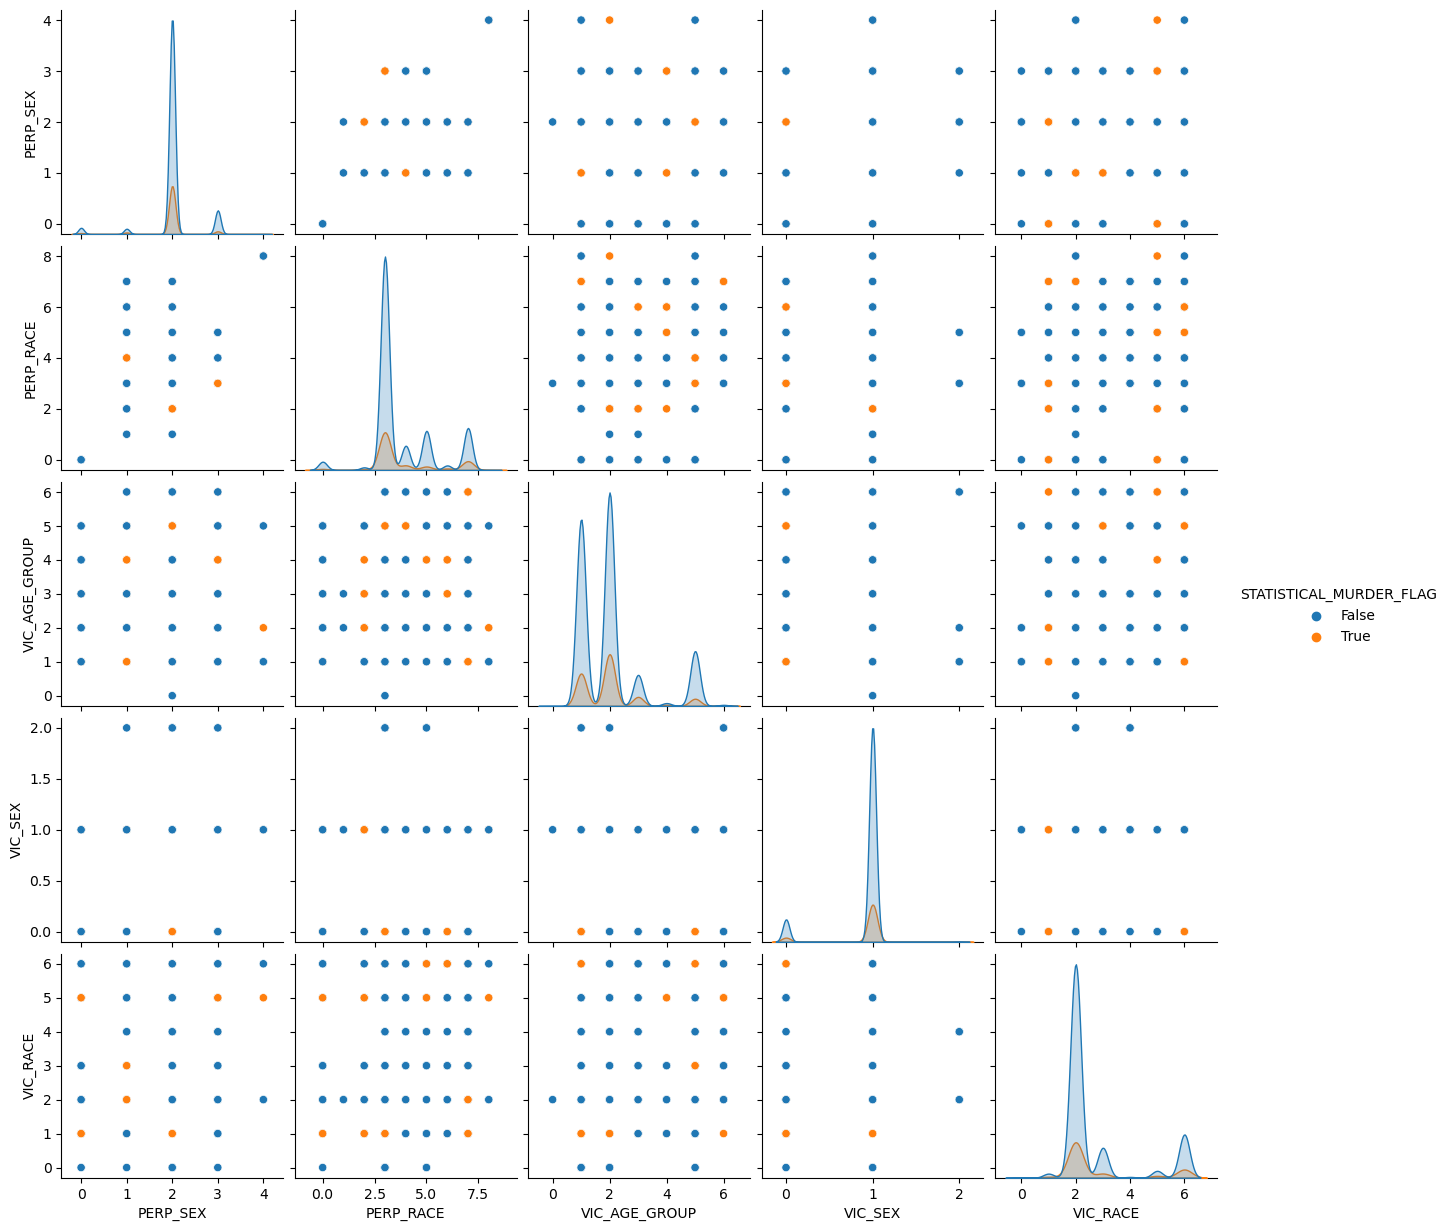

In [19]:
# List of relevant features for your target
relevant_features = ['PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 'STATISTICAL_MURDER_FLAG']

# Filter the dataset to include only relevant features
data_subset = data[relevant_features]

# Pairplot to visualize relationships
sns.pairplot(data_subset, hue='STATISTICAL_MURDER_FLAG', diag_kind='kde')
plt.show()

#This visualization provides insights into how different demographic features of perpetrators and victims relate to the fatality of shooting incidents, making it easier to identify patterns and correlations.

### Interactive Scatter Plot of Shooting Incidents

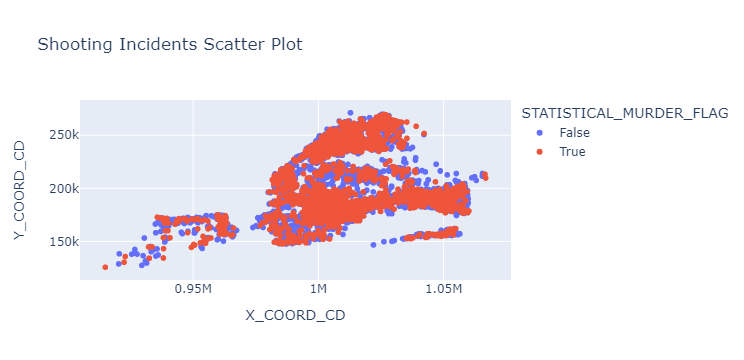

In [20]:
import plotly.express as px

fig = px.scatter(data, x='X_COORD_CD', y='Y_COORD_CD', color='STATISTICAL_MURDER_FLAG', 
                 hover_data=['BORO', 'OCCUR_TIME'],
                 title='Shooting Incidents Scatter Plot')
fig.show()

#This interactive scatter plot lets you see where shooting incidents happened. By hovering over each point, you can get more details like the borough and time of the incident. It helps you spot trends and problem areas in a clear, visual way.

### Distribution of Victim Gender

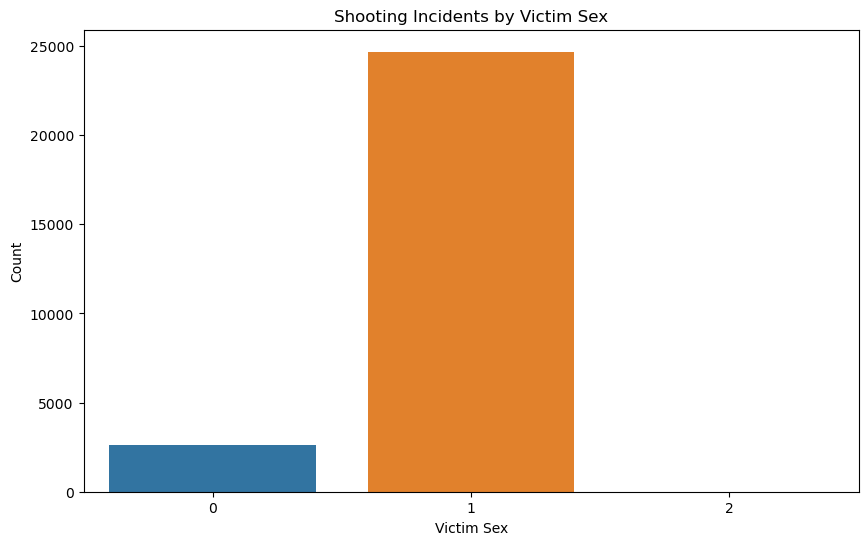

In [21]:
# Victim Sex
plt.figure(figsize=(10, 6))
sns.countplot(x='VIC_SEX', data=data)
plt.title('Shooting Incidents by Victim Sex')
plt.xlabel('Victim Sex')
plt.ylabel('Count')
plt.show()

### Visualizing Correlations with a Heatmap


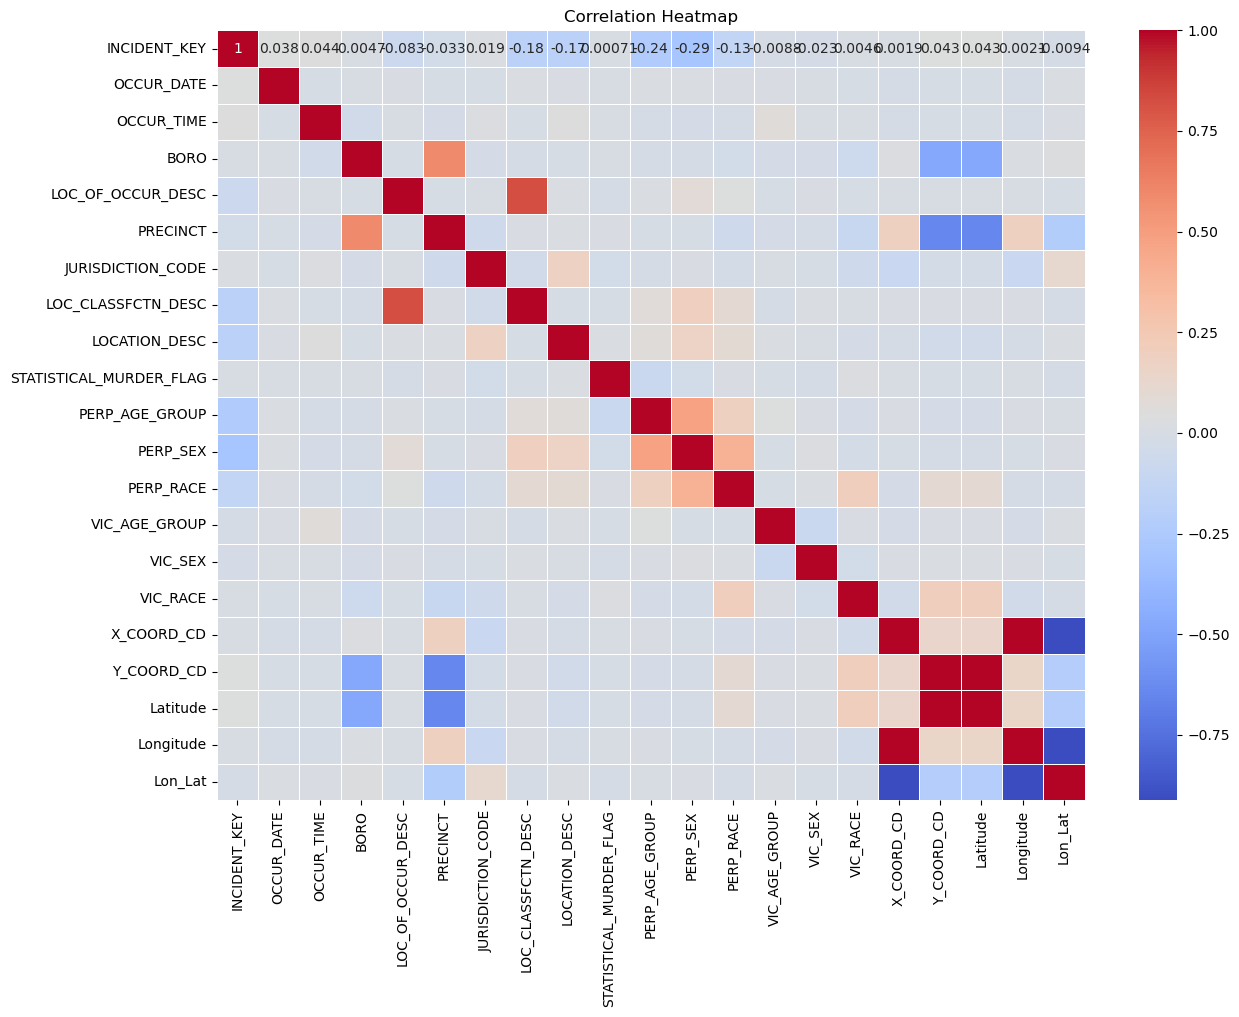

In [22]:
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
#visualization helps identify which features in your dataset are strongly correlated with each other 

## PREDICTIVE MODELING-ML ALGORITHM

### Random Forest

In [23]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"Precision: {precision_score(y_test, y_pred_rf)}")
print(f"Recall: {recall_score(y_test, y_pred_rf)}")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8379951617780466
Precision: 0.8733841564468015
Recall: 0.792600391036246
[[5815  764]
 [1379 5270]]
              precision    recall  f1-score   support

       False       0.81      0.88      0.84      6579
        True       0.87      0.79      0.83      6649

    accuracy                           0.84     13228
   macro avg       0.84      0.84      0.84     13228
weighted avg       0.84      0.84      0.84     13228



In [24]:


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None,10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')

# Evaluate on test data
best_rf = grid_search.best_estimator_
y_pred_rf= best_rf.predict(X_test)
print(f'Optimized Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(classification_report(y_test, y_pred_rf))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8319401244167963
Optimized Random Forest Accuracy: 0.8379951617780466
              precision    recall  f1-score   support

       False       0.81      0.88      0.84      6579
        True       0.87      0.79      0.83      6649

    accuracy                           0.84     13228
   macro avg       0.84      0.84      0.84     13228
weighted avg       0.84      0.84      0.84     13228



### Gradient Boosting

In [25]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb)}")
print(f"Precision: {precision_score(y_test, y_pred_gb)}")
print(f"Recall: {recall_score(y_test, y_pred_gb)}")
print(confusion_matrix(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Performance:
Accuracy: 0.7834895675839129
Precision: 0.818871103622578
Recall: 0.7309369830049631
[[5504 1075]
 [1789 4860]]
              precision    recall  f1-score   support

       False       0.75      0.84      0.79      6579
        True       0.82      0.73      0.77      6649

    accuracy                           0.78     13228
   macro avg       0.79      0.78      0.78     13228
weighted avg       0.79      0.78      0.78     13228



In [26]:
param_grid = {
 
    'n_estimators': [50, 100],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Learning rate
    'max_depth': [3, 5],  # Maximum depth of the individual estimators
    'min_samples_split': [2, 5],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
}



gbm = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gbm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
best_gbm = grid_search.best_estimator_
y_pred_gb = best_gbm.predict(X_test)
print(f'Optimized Gradient Boosting Accuracy: {accuracy_score(y_test, y_pred_gb)}')
print(classification_report(y_test, y_pred_gb))


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8121435977190253
Optimized Gradient Boosting Accuracy: 0.8070758996068945
              precision    recall  f1-score   support

       False       0.77      0.88      0.82      6579
        True       0.86      0.73      0.79      6649

    accuracy                           0.81     13228
   macro avg       0.81      0.81      0.81     13228
weighted avg       0.81      0.81      0.81     13228



### Support Vector Machine

In [27]:
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm)}")
print(f"Precision: {precision_score(y_test, y_pred_svm)}")
print(f"Recall: {recall_score(y_test, y_pred_svm)}")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.7455397641366798
Precision: 0.7847354726799654
Recall: 0.680403068130546
[[5338 1241]
 [2125 4524]]
              precision    recall  f1-score   support

       False       0.72      0.81      0.76      6579
        True       0.78      0.68      0.73      6649

    accuracy                           0.75     13228
   macro avg       0.75      0.75      0.74     13228
weighted avg       0.75      0.75      0.74     13228



In [28]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale','auto'],
    'kernel': ['linear', 'rbf']
}
svm = SVC(random_state=42)

grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
best_svm = grid_search.best_estimator_
y_pred_svm = best_svm.predict(X_test)
print(f'Optimized SVM Accuracy: {accuracy_score(y_test, y_pred_svm)}')
print(classification_report(y_test,y_pred_svm))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.7669453084499741
Optimized SVM Accuracy: 0.7738887208950711
              precision    recall  f1-score   support

       False       0.74      0.84      0.79      6579
        True       0.82      0.71      0.76      6649

    accuracy                           0.77     13228
   macro avg       0.78      0.77      0.77     13228
weighted avg       0.78      0.77      0.77     13228



### XGBoost

In [29]:
from xgboost import XGBClassifier
# Initialize the XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
# Fit the model
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

Confusion Matrix:
[[6002  577]
 [1565 5084]]

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.91      0.85      6579
        True       0.90      0.76      0.83      6649

    accuracy                           0.84     13228
   macro avg       0.85      0.84      0.84     13228
weighted avg       0.85      0.84      0.84     13228



In [30]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree':[0.6, 0.8, 1.0],
    'reg_lambda': [1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.5]
}


grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')
best_xgb_model = grid_search.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)
print(f'Optimized XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb)}')
print(classification_report(y_test, y_pred_xgb))


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 1.0}
Best Score: 0.8490150336962157
Optimized XGBoost Accuracy: 0.8491835500453583
              precision    recall  f1-score   support

       False       0.81      0.90      0.86      6579
        True       0.89      0.80      0.84      6649

    accuracy                           0.85     13228
   macro avg       0.85      0.85      0.85     13228
weighted avg       0.85      0.85      0.85     13228



## Model Comparison

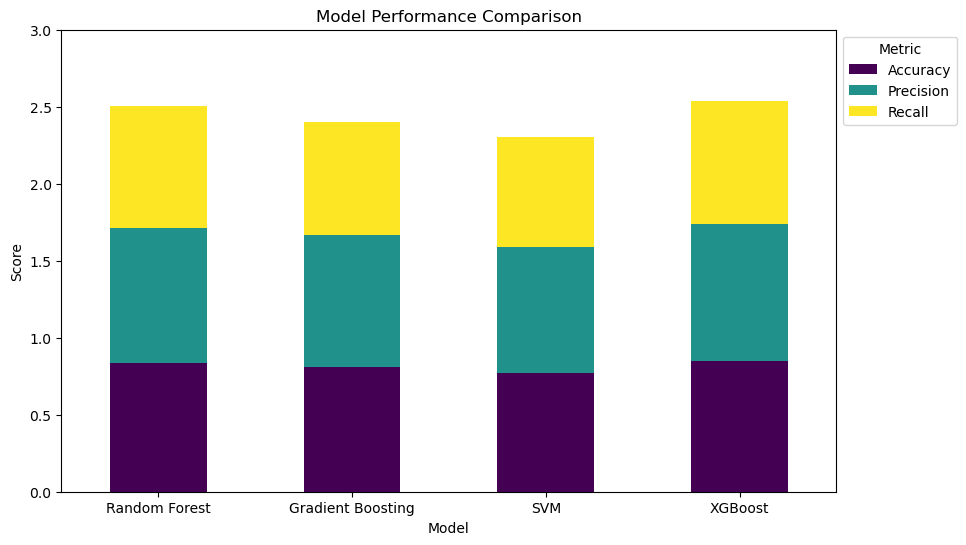

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data for comparison
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'XGBoost']
accuracy = [accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_gb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_xgb)]
precision = [precision_score(y_test, y_pred_rf), precision_score(y_test, y_pred_gb), precision_score(y_test, y_pred_svm), precision_score(y_test, y_pred_xgb)]
recall = [recall_score(y_test, y_pred_rf), recall_score(y_test, y_pred_gb), recall_score(y_test, y_pred_svm), recall_score(y_test, y_pred_xgb)]

# Create DataFrame
comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall
})

# Set index to 'Model'
comparison_df.set_index('Model', inplace=True)

# Plotting the Comparison
comparison_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.ylim(0, 3)  # Adjust the limits to sum of metric maximum if necessary
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Metric')
plt.xticks(rotation=0)
plt.show()


## Cross-Validation

In [32]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_xgb_model, X, y, cv=3, scoring='accuracy')
print(f'Cross-Validation Accuracy: {np.mean(cv_scores)} ± {np.std(cv_scores)}')


Cross-Validation Accuracy: 0.773176625659051 ± 0.017014495575692824


## Model Interpretation with SHAP Values

In [33]:
feature_names = ['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC', 
                 'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 
                 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 
                 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', ' STATISTICAL_MURDER_FLAG ','Lon_Lat']


Feature DataFrame shape: (30864, 20)
Feature names length: 20


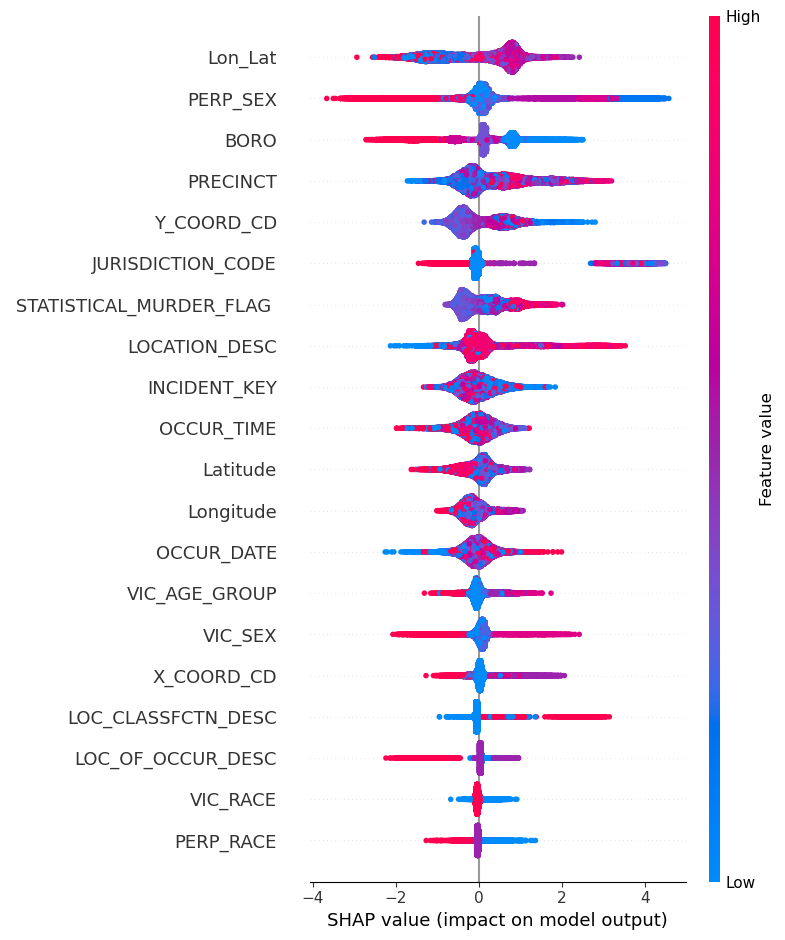

In [34]:
import shap
import pandas as pd


feature_names = ['INCIDENT_KEY', 'OCCUR_DATE', 'OCCUR_TIME', 'BORO', 'LOC_OF_OCCUR_DESC', 
                 'PRECINCT', 'JURISDICTION_CODE', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 
                 'PERP_SEX', 'PERP_RACE', 'VIC_AGE_GROUP', 'VIC_SEX', 'VIC_RACE', 
                 'X_COORD_CD', 'Y_COORD_CD', 'Latitude', 'Longitude', ' STATISTICAL_MURDER_FLAG ','Lon_Lat']



X_train_df = pd.DataFrame(X_train, columns=feature_names)

print(f"Feature DataFrame shape: {X_train_df.shape}")
print(f"Feature names length: {len(feature_names)}")


explainer = shap.TreeExplainer(best_xgb_model)
shap_values = explainer.shap_values(X_train_df)


shap.summary_plot(shap_values, X_train_df, feature_names=feature_names)


In [35]:
import joblib

# Save the model to a file
joblib.dump(xgb_model, 'best_xgb_model.pkl')


['best_xgb_model.pkl']